<a href="https://colab.research.google.com/github/gandikot/EXCELR_ASSIGNMENTS/blob/main/EDA_Resume_Classificationynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install docx2txt

  Preparing metadata (setup.py) ... done
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3960 sha256=693b9d1be30476dc2b25ff0063c6a720ff5c757a0d64fdc27495eb3584344185
  Stored in directory: /root/.cache/pip/wheels/22/58/cf/093d0a6c3ecfdfc5f6ddd5524043b88e59a9a199cb02352966
Successfully built docx2txt


In [9]:
!pip install python-docx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 4.0 MB/s eta 0:00:00


In [75]:
!pip install pip==24.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [76]:
!pip install textract

  Using cached textract-1.6.5-py3-none-any.whl.metadata (2.5 kB)
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.5/128.5 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

In [11]:
!pip install --upgrade pip


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.4 MB/s eta 0:00:00
DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0


In [13]:
!pip install mammoth


    extract-msg (<=0.29.*)
                 ~~~~~~~^


In [27]:
import mammoth
from textblob import TextBlob


In [50]:
import os
import spacy
import docx2txt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from docx import Document
from textblob import TextBlob
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
import textract
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Define your file path
file_path = '/content/Resume_Docx/'  # Ensure this path ends with '/'


In [3]:
# Lists to store file names and folder names
doc_file = []
docx_file = []
pdf_file = []
folder_name = []


In [21]:
# Iterate through folders in the main directory
for folder in os.listdir(file_path):
    folder_path = os.path.join(file_path, folder)

    # Check if the path is a directory and skip system folders
    if not os.path.isdir(folder_path) or folder.startswith('.ipynb_checkpoints'):
        continue

    # Iterate through files in the folder
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)

        # Check file extensions and categorize files
        if file.endswith('.doc'):
            doc_file.append(file)
            folder_name.append(folder)
        elif file.endswith('.docx'):
            docx_file.append(file)
            folder_name.append(folder)
        elif file.endswith('.pdf'):
            pdf_file.append(file)
            folder_name.append(folder)



In [22]:
# Print categorized files
print("DOC files:", doc_file)
print("DOCX files:", docx_file)
print("PDF files:", pdf_file)
print("Folder names:", folder_name)


DOC files: ['Nazeer Basha.doc', 'Tatikonda Kiran Kumar.doc', 'Priyanka L.doc']
DOCX files: ['RameshNataru[3_4].docx', 'Ramalakshmi K.docx', 'Anil kumar.docx', 'Buddha Vamsi.docx', 'Vinod B.docx', 'kamballapradeep.docx', 'premsai.docx', 'AradhanaTripathi[4_0].docx', 'Neeraj Mishra.docx', 'PSyamKumar[2_3].docx', 'Rajupavanakumari[2_10].docx']
PDF files: []
Folder names: ['SQL Developer', 'SQL Developer', 'SQL Developer', 'SQL Developer', 'SQL Developer', 'SQL Developer', 'SQL Developer', 'SQL Developer', 'SQL Developer', 'SQL Developer', 'SQL Developer', 'SQL Developer', 'SQL Developer', 'SQL Developer']


In [23]:
print('Number of .doc Files  = {}'.format(len(doc_file)),'\n'
      'Number of .pdf Files  = {}'.format(len(pdf_file)),'\n'
      'Number of .docx Files = {}'.format(len(docx_file)))


Number of .doc Files  = 3 
Number of .pdf Files  = 0 
Number of .docx Files = 11


In [24]:
print("Total Number of Files = ", len(docx_file)+len(doc_file)+len(pdf_file))


Total Number of Files =  14


In [25]:
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}


In [26]:
rcParams

{'xtick.labelsize': '14', 'ytick.labelsize': '14', 'axes.labelsize': '16'}

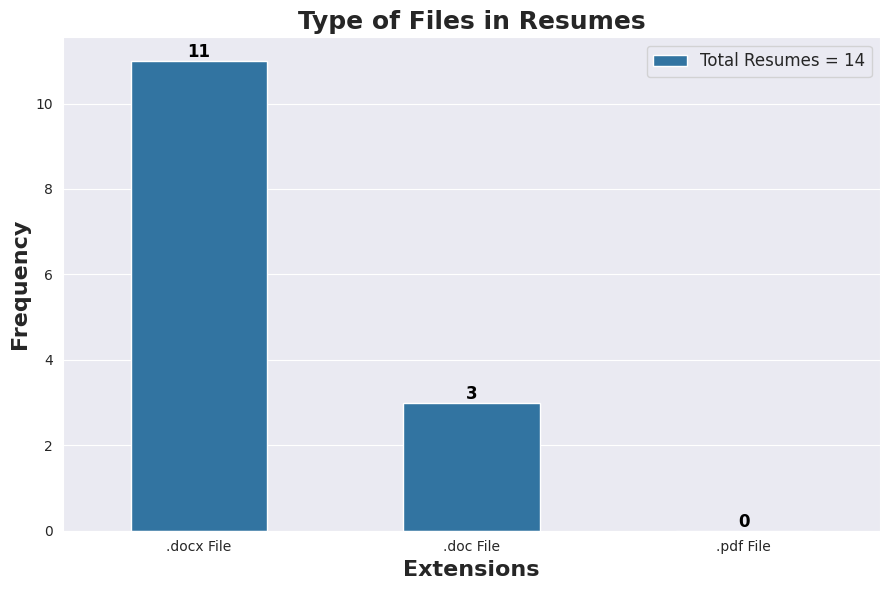

In [28]:
fig, axe = plt.subplots(1,1, figsize=(9,6), dpi=100)
ax = sns.barplot(x=['.docx File','.doc File','.pdf File'], y= [len(docx_file),len(doc_file),len(pdf_file)], width=0.5,
                 ax = axe, label= 'Total Resumes = {}'.format(len(docx_file)+len(doc_file)+len(pdf_file)))

axe.set_xlabel('Extensions', size=16,fontweight = 'bold')
axe.set_ylabel('Frequency', size=16,fontweight = 'bold')
plt.legend(loc='best', fontsize= 'large')
plt.title('Type of Files in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG\File_Type_Bar', dpi = 500)


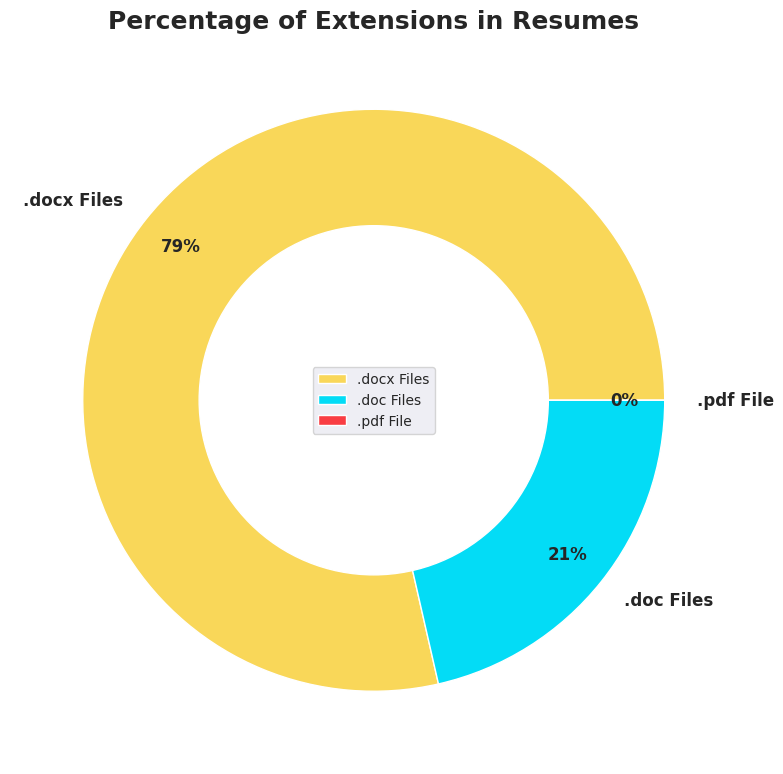

In [29]:
fig = plt.figure(figsize=(8,8), dpi = 100)

sizes = [len(docx_file),len(doc_file),len(pdf_file)]
labels = ['.docx Files','.doc Files','.pdf File']
colors = ['#F9D759', '#03DCF6', '#F93D43']
explode = (0.00, 0.00, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance= 0.85,
        explode= explode, startangle= 0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='w')
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Extensions in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc= "center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG\Per_File_Pai', dpi = 500)

In [51]:
# Define your file path
file_path = '/content/Resume_Docx/'  # Ensure this path ends with '/'


In [52]:
# Lists to store file names and folder names
doc_file = []
docx_file = []
pdf_file = []
folder_name = []


In [53]:
# Iterate through folders in the main directory
for folder in os.listdir(file_path):
    folder_path = os.path.join(file_path, folder)

    # Check if the path is a directory and skip system folders
    if not os.path.isdir(folder_path) or folder.startswith('.ipynb_checkpoints'):
        continue

    # Iterate through files in the folder
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)

        # Check file extensions and categorize files
        if file.endswith('.doc'):
            doc_file.append(file)
            folder_name.append(folder)
        elif file.endswith('.docx'):
            docx_file.append(file)
            folder_name.append(folder)
        elif file.endswith('.pdf'):
            pdf_file.append(file)
            folder_name.append(folder)


In [54]:
# Combine all files into one list
all_files = doc_file + docx_file + pdf_file
all_folders = folder_name


In [55]:
# Create the DataFrame
resume_data = pd.DataFrame({
    'Profile': all_folders,
    'File_name' : all_files
})

In [51]:
print(resume_data)

          Profile                    File_name
0   SQL Developer             Nazeer Basha.doc
1   SQL Developer    Tatikonda Kiran Kumar.doc
2   SQL Developer               Priyanka L.doc
3   SQL Developer       RameshNataru[3_4].docx
4   SQL Developer           Ramalakshmi K.docx
5   SQL Developer              Anil kumar.docx
6   SQL Developer            Buddha Vamsi.docx
7   SQL Developer                 Vinod B.docx
8   SQL Developer         kamballapradeep.docx
9   SQL Developer                 premsai.docx
10  SQL Developer   AradhanaTripathi[4_0].docx
11  SQL Developer           Neeraj Mishra.docx
12  SQL Developer         PSyamKumar[2_3].docx
13  SQL Developer  Rajupavanakumari[2_10].docx


In [52]:
resume_data.Profile.value_counts().index


Index(['SQL Developer'], dtype='object', name='Profile')

In [53]:
resume_data.Profile.value_counts()


,count
Profile,
SQL Developer,14


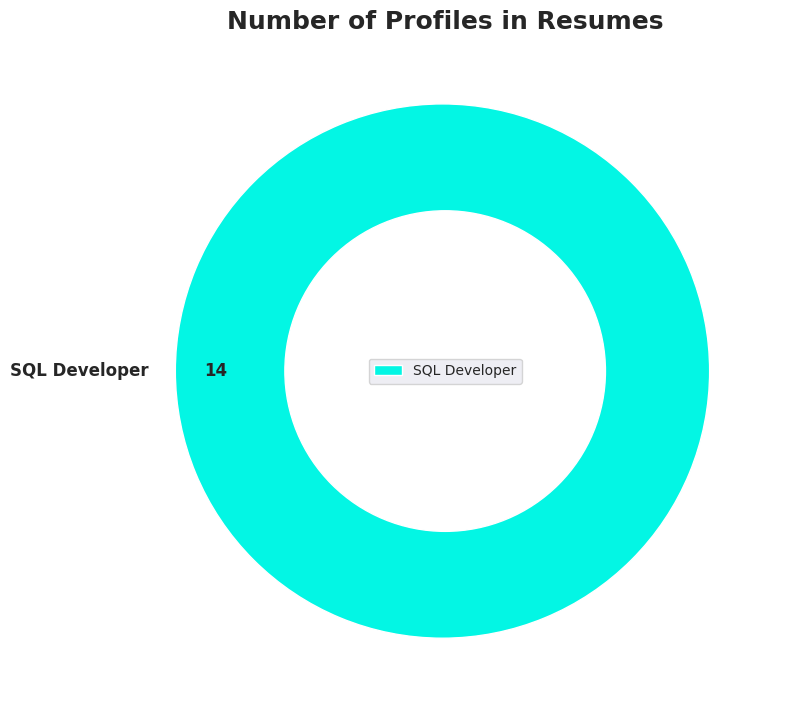

In [60]:
fig = plt.figure(figsize=(8,8))

# Value counts and labels
sizes = resume_data.Profile.value_counts()
labels = resume_data.Profile.value_counts().index

# Colors for the pie chart
colors = ['#03F6E4', '#0380F6', '#C603F6', '#F65B03'] * len(sizes)  # Extend colors if needed
colors = colors[:len(sizes)]  # Trim to match the number of slices

# Dynamically generate the 'explode' array
explode = [0.01] * len(sizes)

# Plot the pie chart
plt.pie(sizes, colors=colors, labels=labels, autopct=lambda x: '{:.0f}'.format(x * sizes.sum() / 100),
        pctdistance=0.85, explode=explode, startangle=0, textprops={'size': 'large', 'fontweight': 'bold'})

# Add a white circle to create a donut chart
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig.gca().add_artist(centre_circle)

# Add title and legend
plt.title('Number of Profiles in Resumes', fontsize=18, fontweight='bold')
plt.legend(labels, loc="center")

# Adjust layout and save the figure
fig.tight_layout()
plt.show()



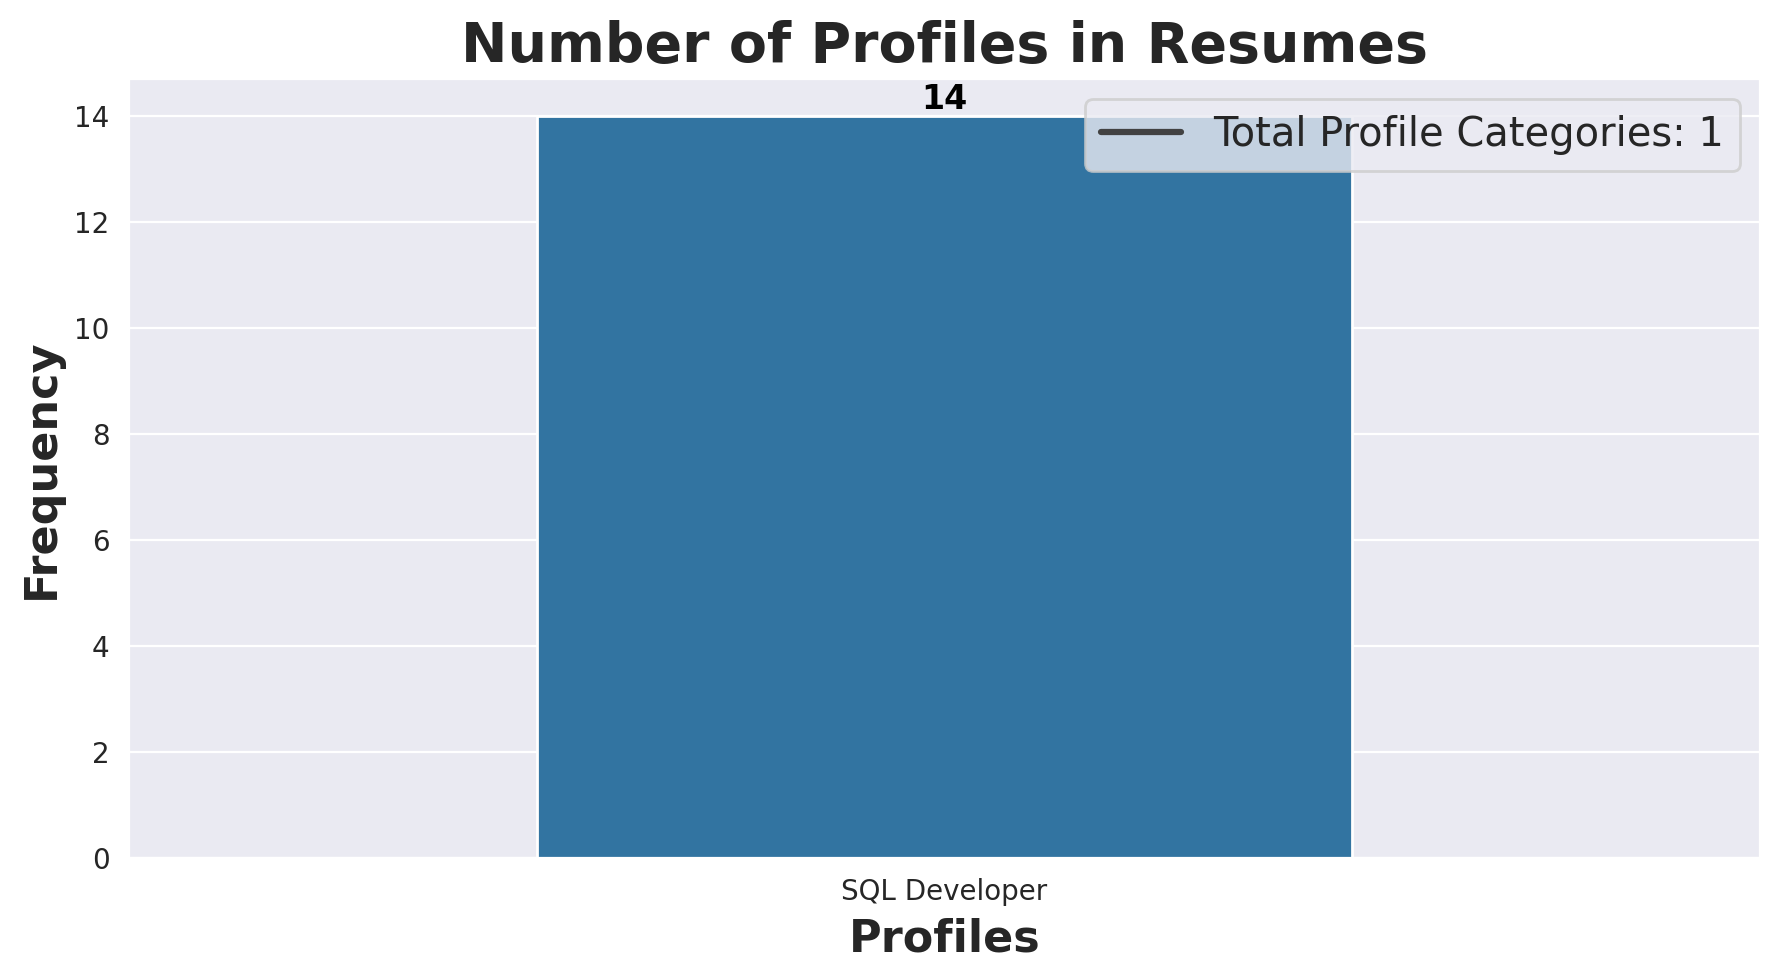

In [56]:
# Create the figure and axis
fig, axe = plt.subplots(1, 1, figsize=(9,5), dpi=200)

# Bar plot with explicit x and y
profile_counts = resume_data.Profile.value_counts()
ax = sns.barplot(
    x=profile_counts.index,
    y=profile_counts.values,
    width=0.5,
    ax=axe
)

# Customize the plot
axe.set_xlabel('Profiles', size=16, fontweight='bold')
axe.set_ylabel('Frequency', size=16, fontweight='bold')
plt.xticks(rotation=0)
plt.legend(
    ['Total Profile Categories: {}'.format(len(resume_data.Profile.unique()))],
    loc='best',
    fontsize='x-large'
)
plt.title('Number of Profiles in Resumes', fontsize=20, fontweight='bold')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, color='black', fontweight='bold', fontsize=12)

# Adjust layout and save the figure
fig.tight_layout()
plt.show()

Sizes: Profile
SQL Developer    14
Name: count, dtype: int64
Labels: Index(['SQL Developer'], dtype='object', name='Profile')


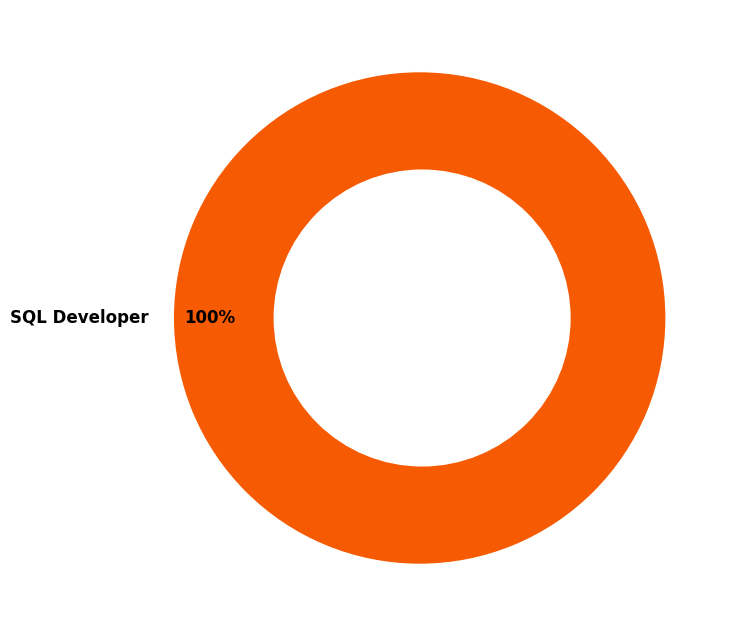

In [57]:
# Data
sizes = resume_data.Profile.value_counts()
labels = resume_data.Profile.value_counts().index

# Verify data
print("Sizes:", sizes)
print("Labels:", labels)

# Adjust lengths to match
colors = ['#F65B03', '#F2F603', '#C603F6', '#03F68B']
explode = [0.01] * len(sizes)  # Dynamically match the length of `sizes`

# Create the pie chart
fig = plt.figure(figsize=(8, 8), dpi=100)
plt.pie(
    sizes,
    colors=colors[:len(sizes)],  # Adjust color length to match
    labels=labels,
    autopct='%1.0f%%',
    pctdistance=0.85,
    explode=explode,
    startangle=0,
    textprops={'size': 'large', 'fontweight': 'bold', 'color': 'black'}
)

# Add a center circle for the doughnut shape
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig.gca().add_artist(centre_circle)



In [15]:
def extract_text_from_docx(docx_path):
    with open(docx_path, "rb") as f:
        result = mammoth.extract_raw_text(f)
        return result.value


In [17]:
docx_path = "/content/Resume_Docx/peoplesoft Resume/Peoplesoft Admin_Murali.docx"
print(extract_text_from_docx(docx_path))


Murali



Experience Summary 



I have 6 years of experience working in PeopleSoft Administration and performing various infrastructure related activities in PeopleSoft environments. 



Installed and configured PeopleSoft 9.0,9.1,9.2 Web server, Application server, Database server and Process scheduler 

server on Windows, UNIX and Linux platforms.

Creating Domains for Web server, Application server and Process scheduler server.

Applied Patches Manually and applied Maintenance Packs through Change Assistant tool.

Experience in DPKs installations.

Applying TAX UPDATES and fixes using PUM

Migrating projects from one environment to another environment using Application Designer and also through CAPI, STAT tools.

Performed Single sign on (SSO)Implementation.

Experience in running Compare Reports between pre and Post Migrations.

Experience in setting up Client Workstation for Developers and Testers.

Involved in Configuration of Integration Broker setting up Between the Modules fo

In [19]:
resume_data = pd.read_csv('/content/Cleaned_Resumes.csv')
resume_data


,Category,Resume_Details
0,PeopleSoft,anubhav kumar singh work globally competitive ...
1,PeopleSoft,ananda rayudu profile summary years experience...
2,PeopleSoft,peoplesoft database administrator gangareddy p...
3,PeopleSoft,classification internal murali experience summ...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...
74,Workday,workday integration consultant name sri krishn...
75,Workday,seeking suitable positions workday hcm techno ...
76,Workday,workday hcm fcm name role kumar workday consul...
77,Workday,venkateswarlu workday consultant professional ...


In [23]:
resume_data['Resume_Details']


,Resume_Details
0,anubhav kumar singh work globally competitive ...
1,ananda rayudu profile summary years experience...
2,peoplesoft database administrator gangareddy p...
3,classification internal murali experience summ...
4,priyanka ramadoss mountpleasant coonoor nilgir...
...,...
74,workday integration consultant name sri krishn...
75,seeking suitable positions workday hcm techno ...
76,workday hcm fcm name role kumar workday consul...
77,venkateswarlu workday consultant professional ...


In [41]:
countvec = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(1,2))
ngrams = countvec.fit_transform(resume_data['Resume_Details']) # matrix of ngrams
count_values = ngrams.toarray().sum(axis=0) # count frequency of ngrams

vocab = countvec.vocabulary_ # list of ngrams
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k, i in vocab.items()],
                               reverse=True)).rename(columns={0: 'Frequency', 1:'Unigram_Bigram'})


In [42]:
df_ngram.head(20)


,Frequency,Unigram_Bigram
0,582,experience
1,451,peoplesoft
2,427,workday
3,415,application
4,394,using
5,358,server
6,331,data
7,326,reports
8,323,project
9,280,sql


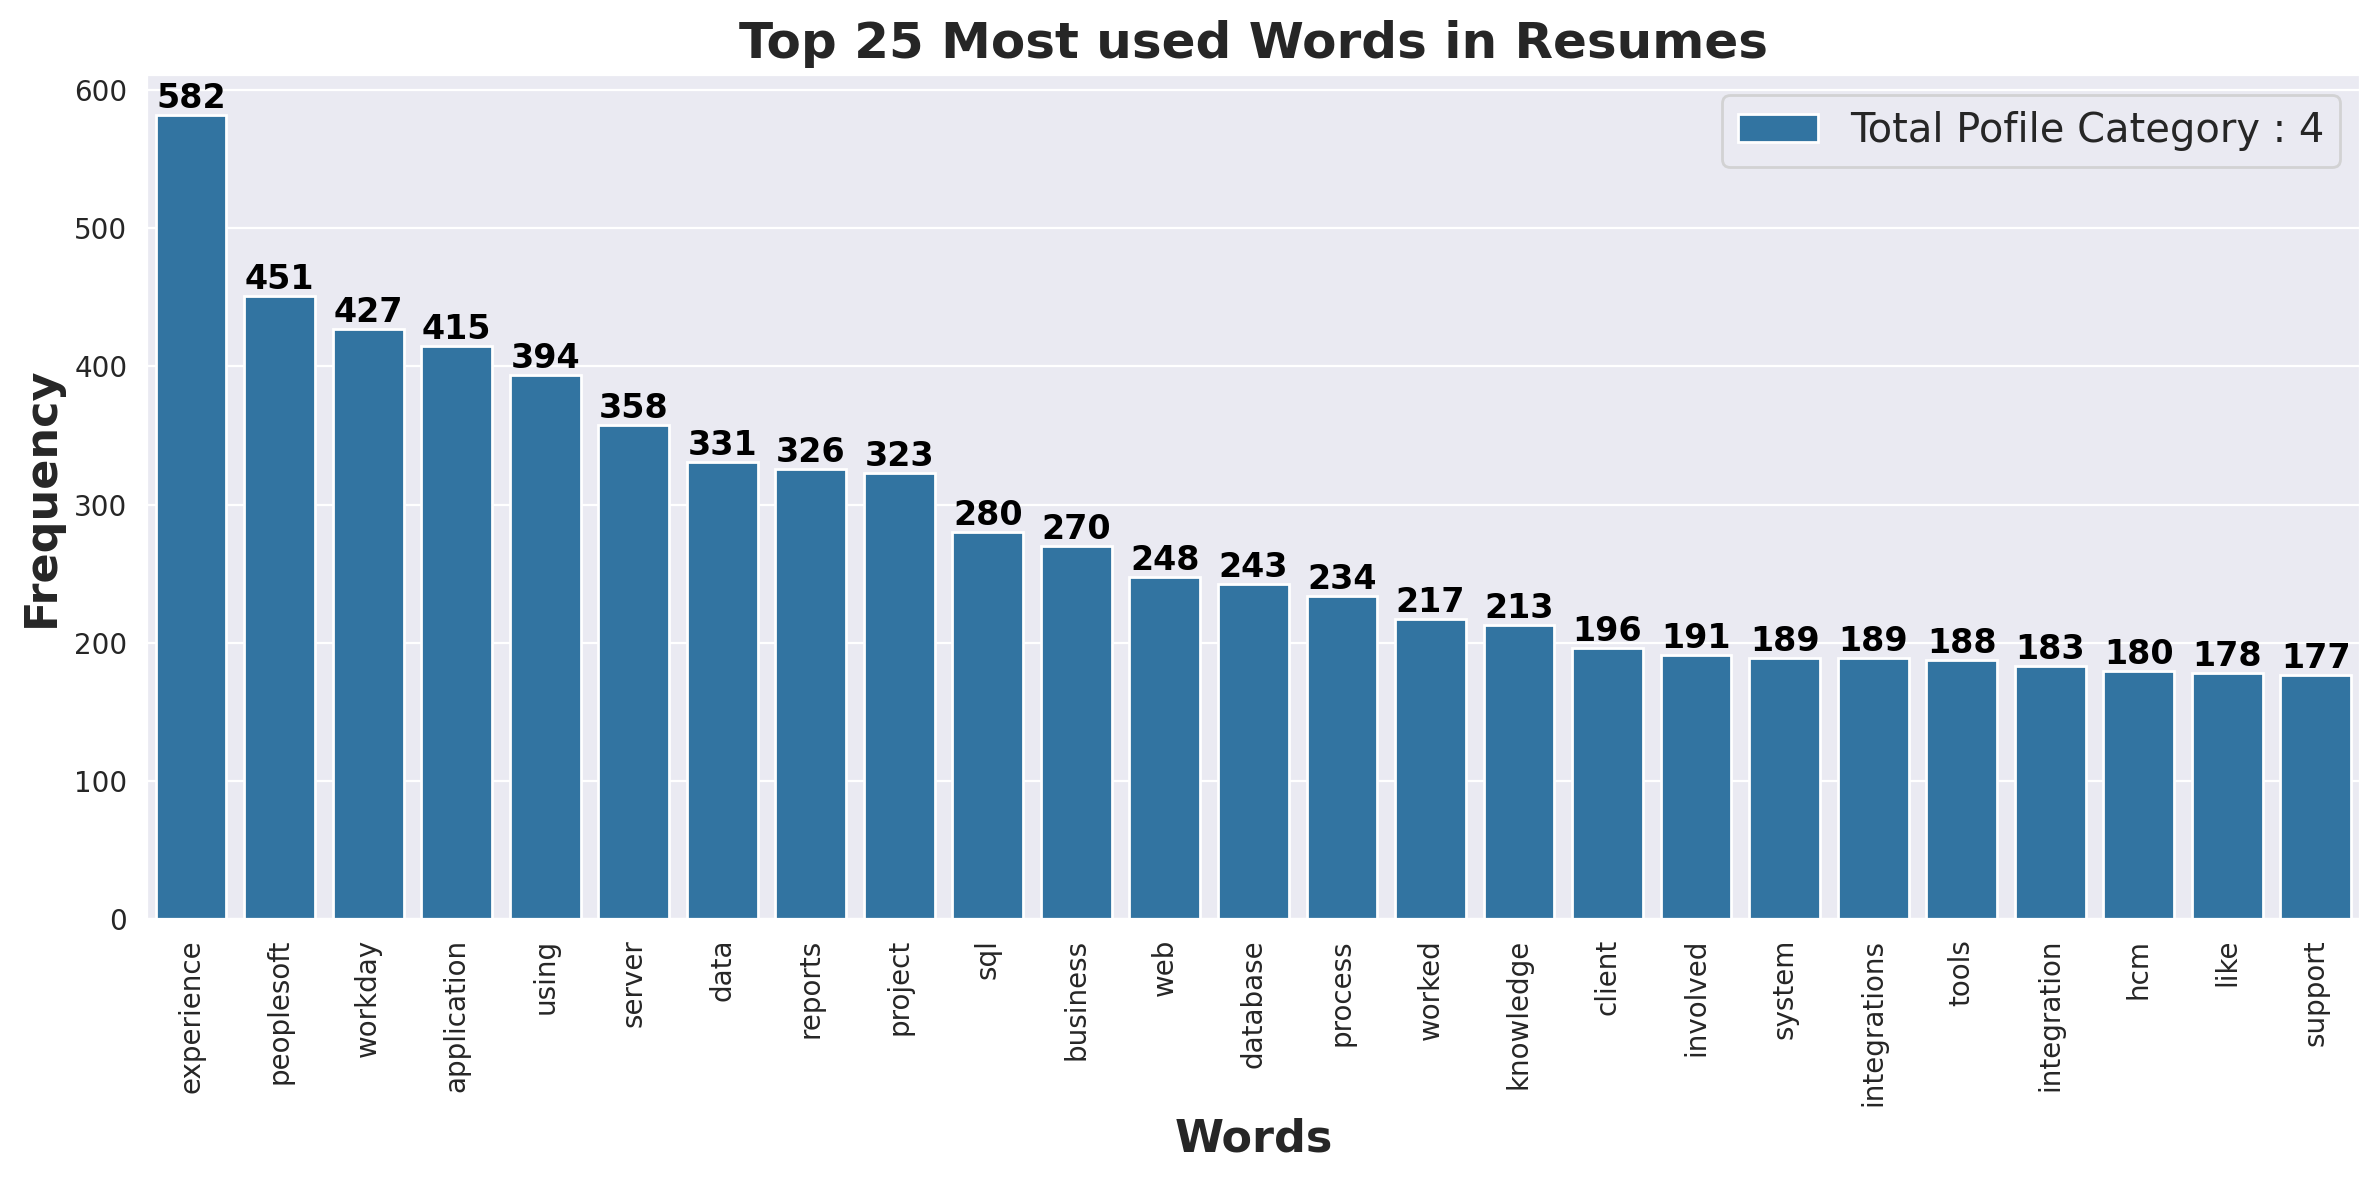

In [45]:
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=200)
ax = sns.barplot(x=df_ngram['Unigram_Bigram'].head(25), y=df_ngram.Frequency.head(25), data=resume_data, ax = axe,
            label='Total Pofile Category : {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Words', size=16,fontweight= 'bold')
axe.set_ylabel('Frequency', size=16, fontweight= 'bold')
plt.xticks(rotation = 90)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Words in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)


fig.tight_layout()
plt.show()



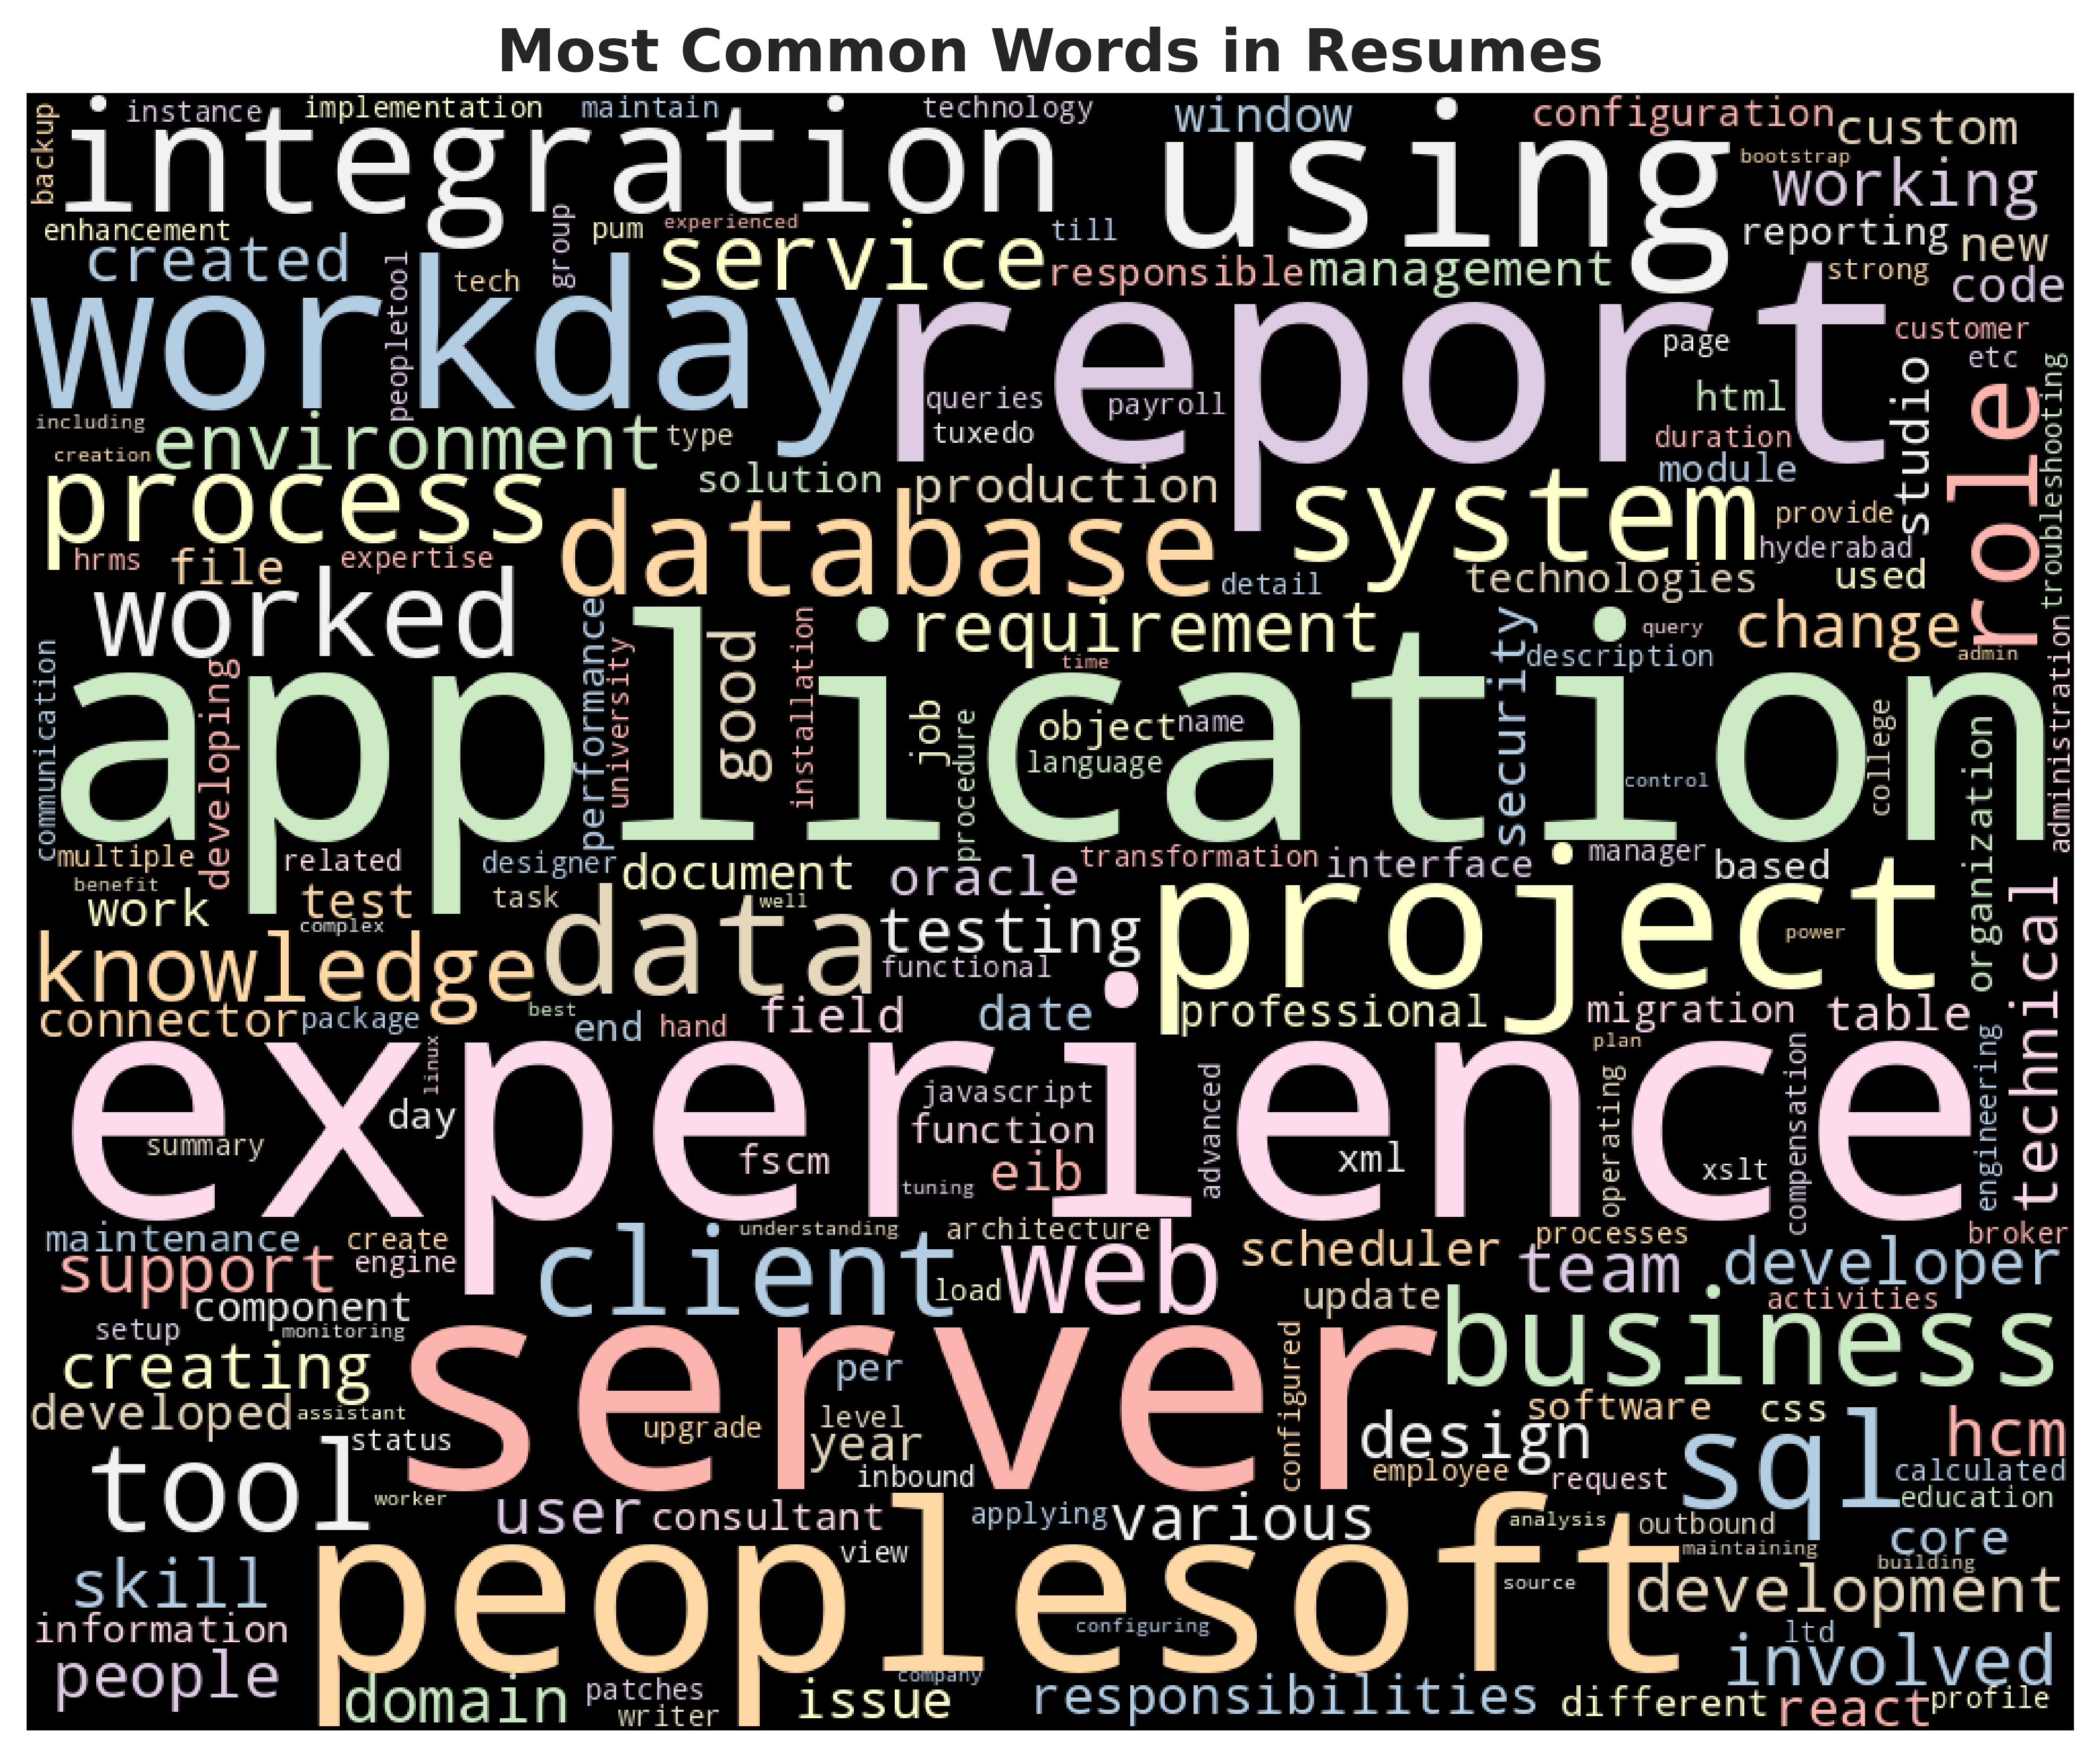

In [47]:
text = " ".join(cat for cat in resume_data.Resume_Details) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black",
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,8), dpi=500) # Display the generated Word Cloud
plt.title('Most Common Words in Resumes', fontsize= 16, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")


plt.show()